# BA Final Exam

# Han Xu

# hx668

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('YPM.csv')

In [3]:
df.head()

,Age,Gender,Real Estate Purchases?,Value of Investments ($),Number of Transactions,Broadband Access?,Household Income ($),Have Children?
0,38,Female,No,12200,4,Yes,75200,Yes
1,30,Male,No,12400,4,Yes,70300,Yes
2,41,Female,No,26800,5,Yes,48200,No
3,28,Female,Yes,19600,6,No,95300,No
4,31,Female,Yes,15100,5,No,73300,Yes


In [4]:
def tonum(x):
    if x in ['Male','No']:
        return 0
    else:
        return 1
vectonum = np.vectorize(tonum)

In [5]:
df['Gender'] = vectonum(df['Gender'])
df['Real Estate Purchases?'] = vectonum(df['Real Estate Purchases?'])
df['Broadband Access?'] = vectonum(df['Broadband Access?'])
df['Have Children?'] = vectonum(df['Have Children?'])

In [6]:
df.head()

,Age,Gender,Real Estate Purchases?,Value of Investments ($),Number of Transactions,Broadband Access?,Household Income ($),Have Children?
0,38,1,0,12200,4,1,75200,1
1,30,0,0,12400,4,1,70300,1
2,41,1,0,26800,5,1,48200,0
3,28,1,1,19600,6,0,95300,0
4,31,1,1,15100,5,0,73300,1


In [7]:
df.corr()

,Age,Gender,Real Estate Purchases?,Value of Investments ($),Number of Transactions,Broadband Access?,Household Income ($),Have Children?
Age,1.000000,0.052175,0.022845,-0.029727,0.021208,-0.046017,0.010395,0.010255
Gender,0.052175,1.000000,0.040508,0.071219,0.018803,-0.010291,-0.041225,0.131152
Real Estate Purchases?,0.022845,0.040508,1.000000,0.028357,0.053694,0.020137,-0.039968,-0.026394
Value of Investments ($),-0.029727,0.071219,0.028357,1.000000,0.085912,0.051124,0.003026,-0.008851
Number of Transactions,0.021208,0.018803,0.053694,0.085912,1.000000,0.006291,0.070633,0.031378
Broadband Access?,-0.046017,-0.010291,0.020137,0.051124,0.006291,1.000000,0.064254,0.032899
Household Income ($),0.010395,-0.041225,-0.039968,0.003026,0.070633,0.064254,1.000000,-0.013952
Have Children?,0.010255,0.131152,-0.026394,-0.008851,0.031378,0.032899,-0.013952,1.000000


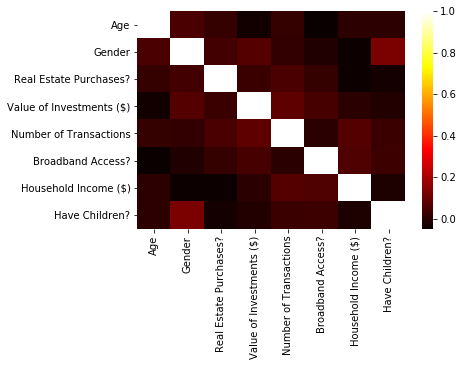

In [8]:
sns.heatmap(df.corr(),cmap='hot')

# Q1

a. I am going to use 'Age','Gender','Real Estate Purchases?','Number of Transactions','Broadband Access?'. Set the p-value = 0.01,I will drop the attribute 'Household Income' and 'Have Children?' because their correlation coefficient with attributes 'Value of Investments' are 0.003026 and -0.008851, which are less than p-value and it means the relationship between them are very weak.

In [9]:
from sklearn.model_selection import train_test_split
y=df['Value of Investments ($)']
X=df[['Age','Gender','Real Estate Purchases?','Number of Transactions','Broadband Access?']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25 ,random_state=24)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr.predict(X_test)

array([28109.8226051 , 28985.74764948, 28775.56164528, 27647.7218233 ,
       30025.79310785, 31325.27563768, 28383.54962971, 31195.18491152,
       25994.59378253, 31846.63399856, 29693.03867135, 26148.9378519 ,
       29710.51410155, 27192.52237074, 26558.60208937, 29672.14759691,
       25956.22727789, 25497.48876486, 30277.70788544, 26835.33779933,
       29465.32386147, 25518.3798393 , 28022.25840868, 29916.59345612,
       30869.89939341, 29983.31995359, 31118.45190225, 28901.49234634,
       27045.70059524, 27963.17762131, 31034.24997459, 30554.62038711,
       25812.76777116, 28439.39156454, 30537.14495692, 28372.66506707,
       26666.88056853, 27812.07240448, 29356.86859061, 28565.37564108,
       27045.70059524, 32886.67945692, 32028.46000993, 28340.89968374,
       30379.43861878, 28673.83091194, 29276.02893171, 28211.55333844,
       28004.90639471, 25585.10633676, 27189.16010197, 26481.8690801 ,
       28211.55333844, 27858.08461921, 29798.13167345, 26558.42529766,
      

In [12]:
lr.score(X_test,y_test)

-0.018854063649942576

# Q2

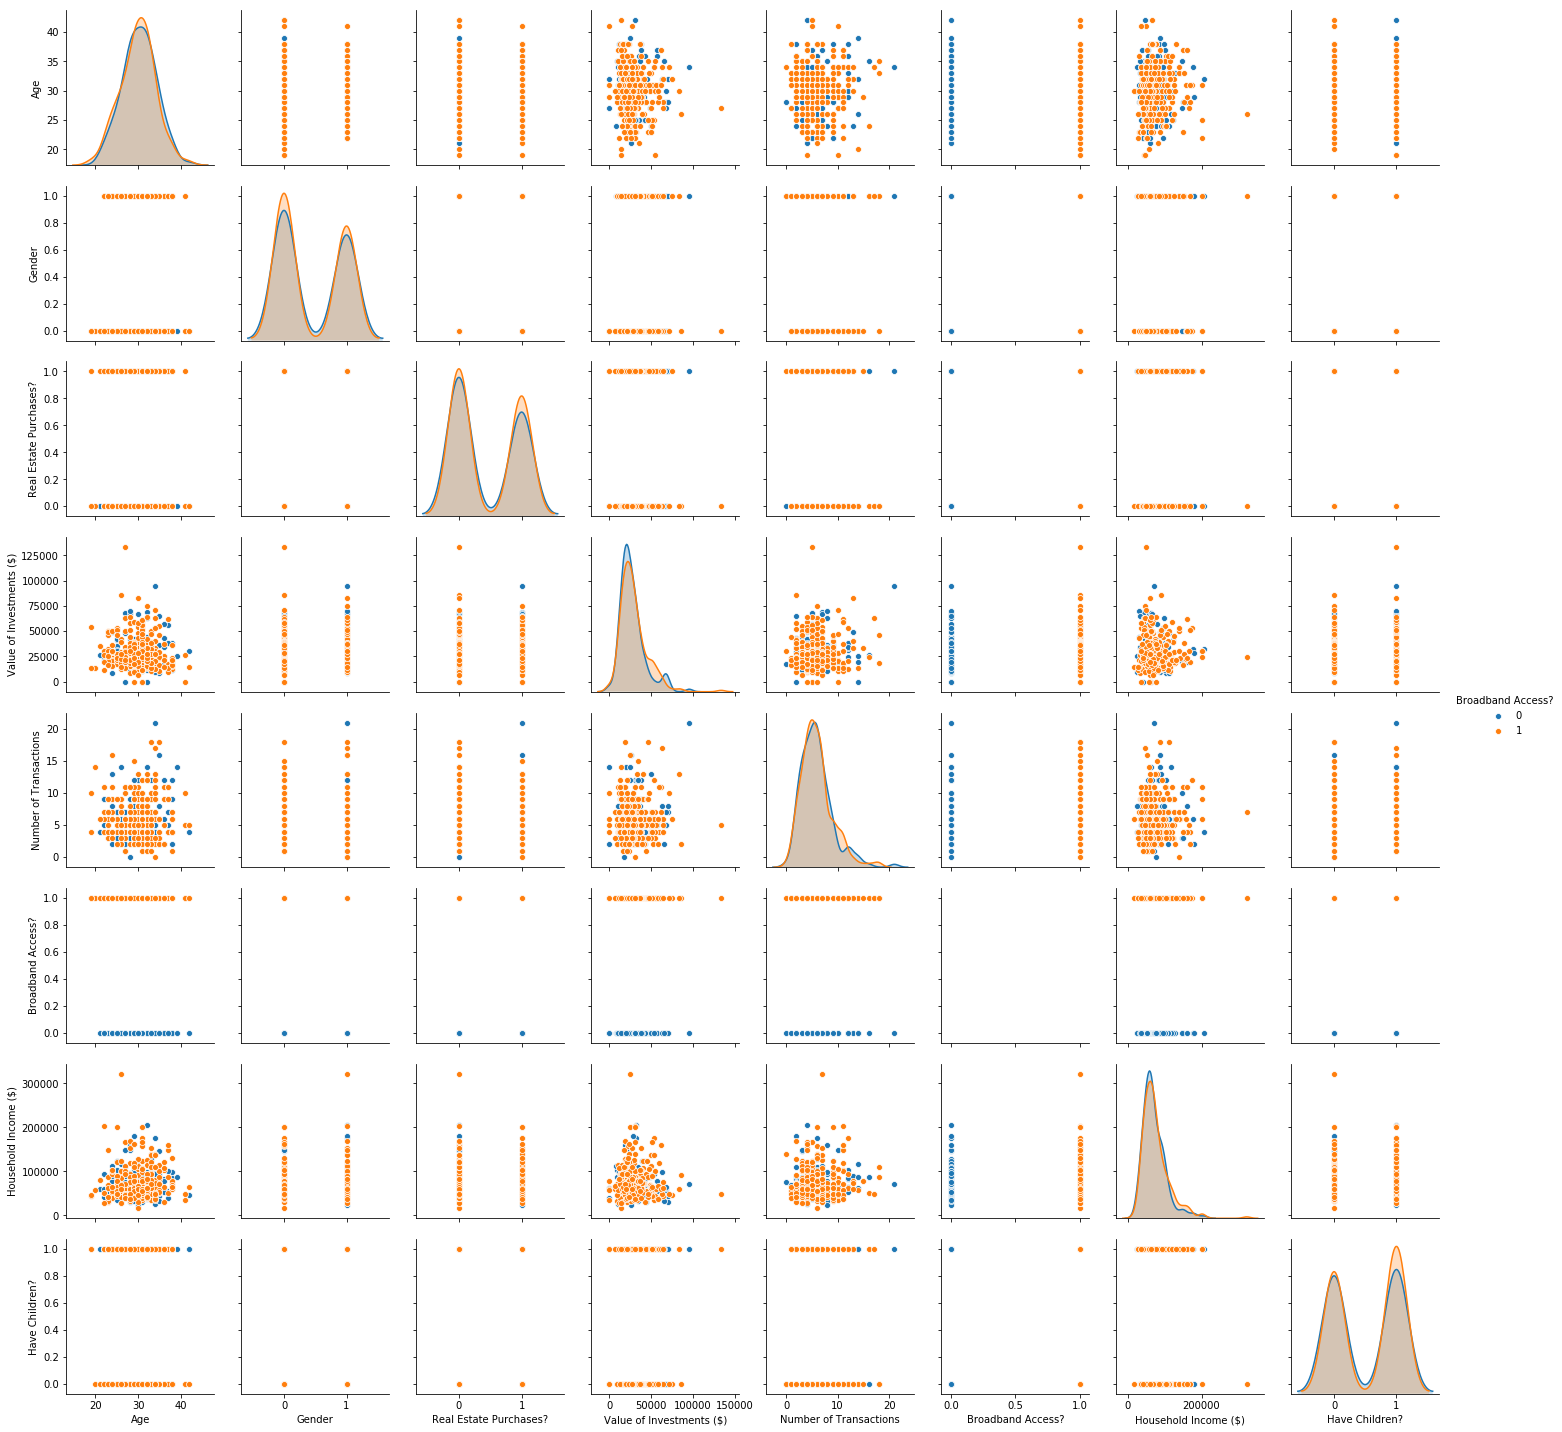

In [13]:
sns.pairplot(df, hue="Broadband Access?")

a. I am going to use 'Age','Gender','Real Estate Purchases?','Household Income','Value of Investments','Have Children?'. Set the p-value = 0.01,I will drop the attribute 'Number of Transactions' because correlation coefficient betweem attributes 'Household Income' and 'Broadband Access?' is 0.006291, which is less than p-value and it means the relationship between them is very weak.

In [14]:
y=df['Broadband Access?']
X=df[['Age','Gender','Real Estate Purchases?','Value of Investments ($)','Household Income ($)','Have Children?']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25 ,random_state=24)

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
log_reg.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
log_reg.score(X_test,y_test)

0.6310679611650486

In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
knn.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [20]:
knn.score(X_test,y_test)

0.4854368932038835

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
tree.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [23]:
tree.score(X_test,y_test)

0.44660194174757284

In [24]:
from sklearn.ensemble import RandomForestClassifier
randomforest= RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
randomforest.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [26]:
randomforest.score(X_test,y_test)

0.5242718446601942

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
gnb.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [29]:
gnb.score(X_test,y_test)

0.5339805825242718

c. For advertising, the most important thing we care is that we want to maxmize the number of real targets (True Positive) in the group of predicted targets(True Positive + Flase Positive). In this way, we should use Precision to measure model performance since Precision = TP/(TP+FP). Also, we need to consider the base rate, since if the precision is lower than the base rate, we should not use any model.

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test,log_reg.predict(X_test),pos_label=0)

0.5

In [31]:
precision_score(y_test,knn.predict(X_test),pos_label=0)

0.3076923076923077

In [32]:
precision_score(y_test,tree.predict(X_test),pos_label=0)

0.28888888888888886

In [33]:
precision_score(y_test,randomforest.predict(X_test),pos_label=0)

0.34285714285714286

In [34]:
precision_score(y_test,gnb.predict(X_test),pos_label=0)

0.2727272727272727

In [35]:
base_rate = np.round(y.value_counts()[0]/len(y),4)
base_rate

0.3756

From the Precision scores above, the best model is Logistic Regression. Also, since its value of precision 0.5 is greater than the base rate. We can apply Logistic Regression model in this case.

# Q3

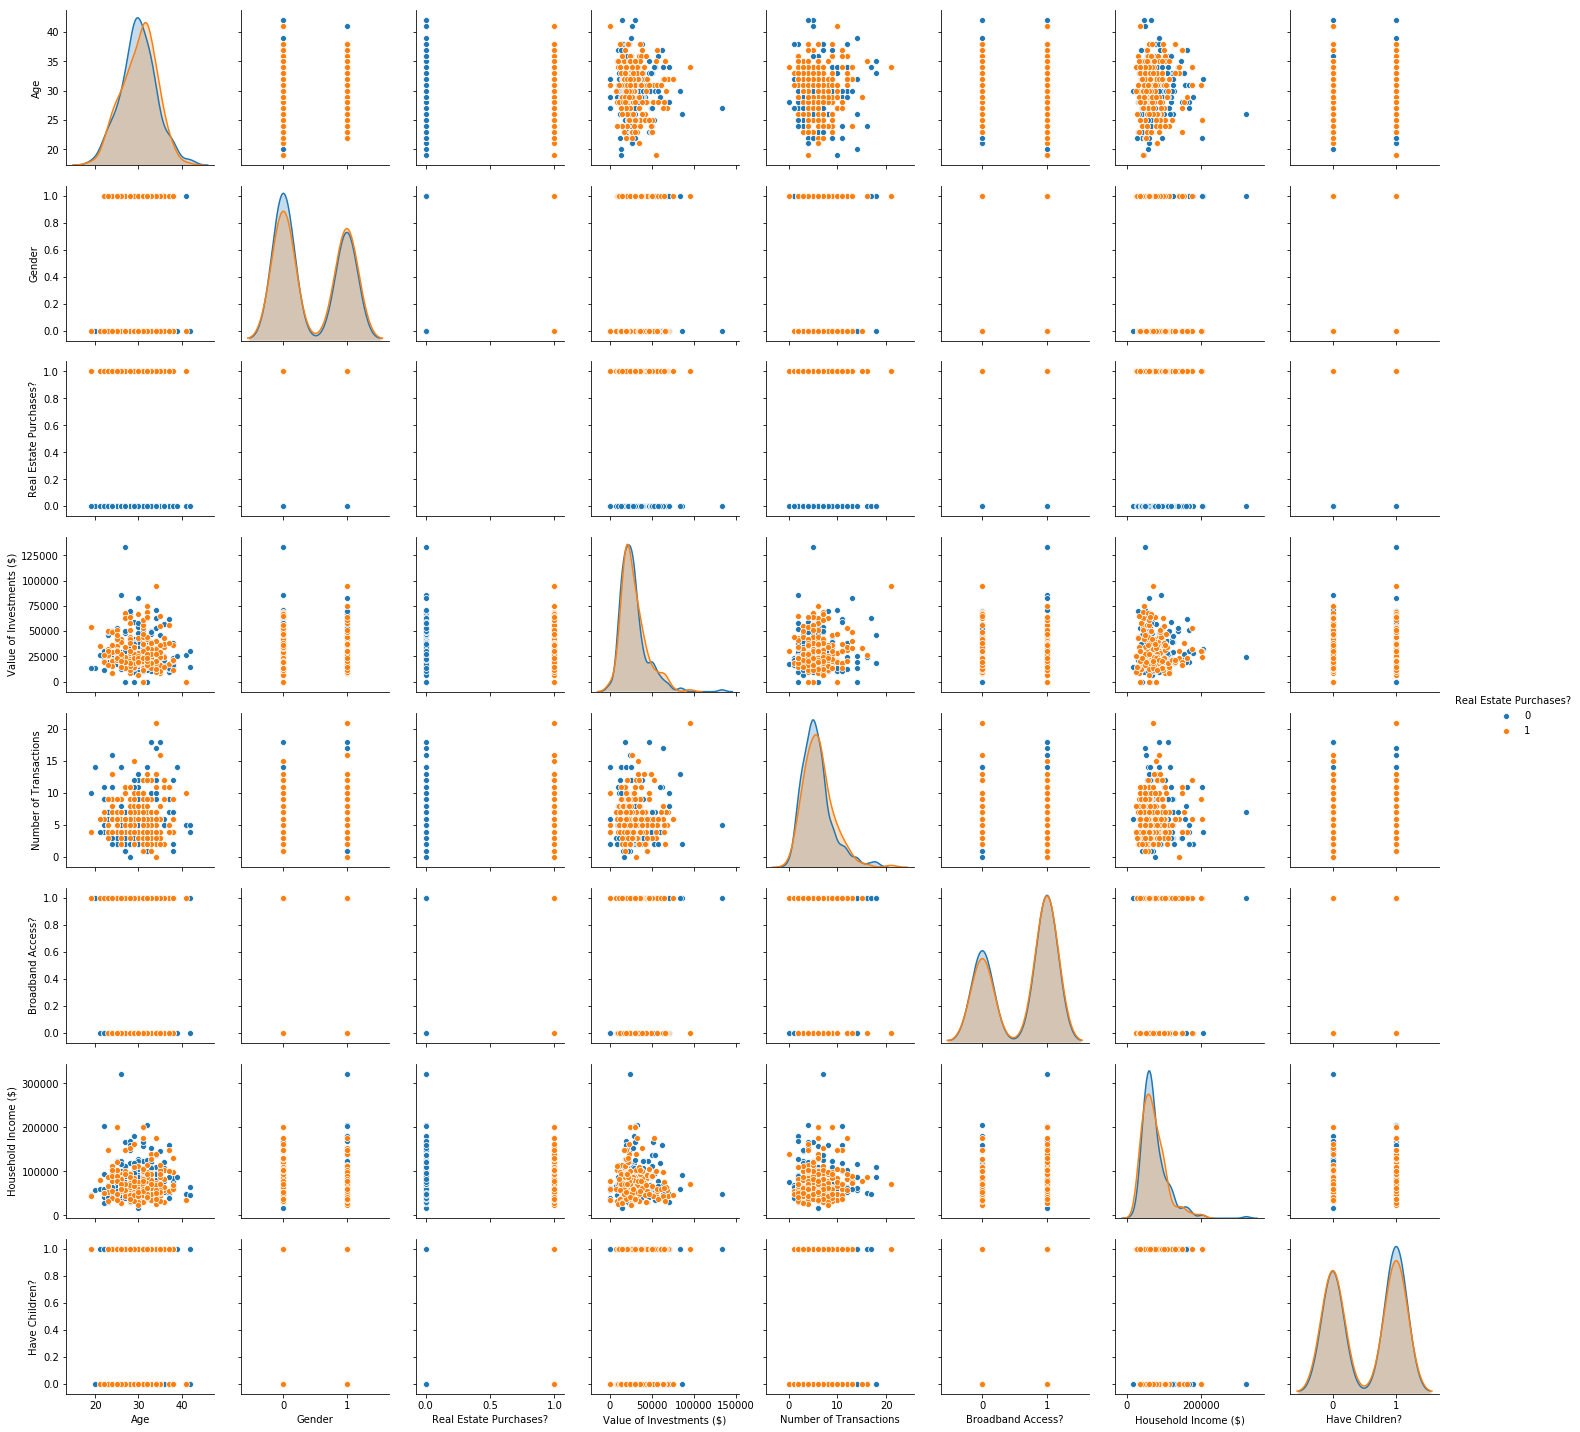

In [36]:
sns.pairplot(df, hue="Real Estate Purchases?")

a. I am going to use all the 7 attributes in this case.

In [37]:
y=df['Real Estate Purchases?']
X=df[['Age','Gender','Broadband Access?','Number of Transactions','Value of Investments ($)','Household Income ($)','Have Children?']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25 ,random_state=24)

In [38]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
log_reg.score(X_test,y_test)

0.5825242718446602

In [40]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [41]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [42]:
knn.score(X_test,y_test)

0.5242718446601942

In [43]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
tree.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [45]:
tree.score(X_test,y_test)

0.4563106796116505

In [46]:
randomforest= RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
randomforest.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [48]:
randomforest.score(X_test,y_test)

0.46601941747572817

In [49]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
gnb.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [51]:
gnb.score(X_test,y_test)

0.5533980582524272

c. For advertising, the most important thing we care is that we want to maxmize the number of real targets (True Positive) in the group of predicted targets(True Positive + Flase Positive). In this way, we should use Precision to measure model performance since Precision = TP/(TP+FP). Also, we need to consider the base rate, since if the precision is lower than the base rate, we should not use any model.

In [52]:
precision_score(y_test,log_reg.predict(X_test))

0.0

In [53]:
precision_score(y_test,knn.predict(X_test))

0.4166666666666667

In [54]:
precision_score(y_test,tree.predict(X_test))

0.3617021276595745

In [55]:
precision_score(y_test,randomforest.predict(X_test))

0.34210526315789475

In [56]:
precision_score(y_test,gnb.predict(X_test))

0.42105263157894735

In [57]:
base_rate = np.round(y.sum()/len(y),4)
base_rate

0.4415

We should not use any models in this case. Since the precision of all the models are lower than the base rate, if we randomly delivery advertisement to users, we could reach more targets than using models.